# Deliverable4
## Zhassulan Yeshmukhametov

#### Q4 Using pyspark, read the data you copied into HDFS in Step 3. You may either use Jupyterhub on EMR (the default user and password are jovyan and jupyter) or work from pyspark in the terminal if you prefer. Once you have created a pyspark DataFrame, complete the following steps below:

- a. Describe the dataset (examples include size, shape, schema) in pyspark
- b. Create a new DataFrame from a query using Spark SQL, filtering to include only the rows where the token is "data" and describe the new dataset
- c. Write the filtered data back to a directory in the HDFS from Spark using df.write.csv(). Be sure to pass the header=True parameter and examine the contents of what you've written.

### Spark Basics and Environment Setup

In [1]:
spark

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1706119119893_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.list_packages()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
list_packages can only use called when spark.pyspark.virtualenv.enabled is set to true
Traceback (most recent call last):
  File "/mnt1/yarn/usercache/livy/appcache/application_1706119119893_0001/container_1706119119893_0001_01_000001/pyspark.zip/pyspark/context.py", line 1606, in list_packages
    raise RuntimeError("list_packages can only use called when "
RuntimeError: list_packages can only use called when spark.pyspark.virtualenv.enabled is set to true



In [9]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1706119119893_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1706119119893_0002,pyspark,idle,Link,Link,None,✔


In [10]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1706119119893_0002,pyspark,idle,Link,Link,None,✔


In [11]:
# install data science & plotting packages

sc.install_pypi_package("pandas==1.0.5") 
sc.install_pypi_package("matplotlib==3.1.1")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Q4
#### Read the file

In [34]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("ReadFromHDFS").getOrCreate()

# Read data from HDFS into a DataFrame
df = spark.read.csv("/user/hadoop/eng_1M_1gram.csv", header=True)

# Stop the Spark session
# spark.stop()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Q4a. Describe the dataset (examples include size, shape, schema) in pyspark

#### Inspecting Data

In [38]:
# Display the schema of a DataFrame
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- token: string (nullable = true)
 |-- year: string (nullable = true)
 |-- frequency: string (nullable = true)
 |-- pages: string (nullable = true)
 |-- books: string (nullable = true)

The `(nullable = true)` indicates that the columns allow null values. If a column's nullable property were set to false, it would mean that the column cannot contain null values.

In [39]:
# Retrieve the column names of a DataFrame
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['token', 'year', 'frequency', 'pages', 'books']

In [41]:
# Let's take a look at our data.
df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(token='inGermany', year='1927', frequency='2', pages='2', books='2'), Row(token='inGermany', year='1929', frequency='1', pages='1', books='1'), Row(token='inGermany', year='1930', frequency='1', pages='1', books='1'), Row(token='inGermany', year='1933', frequency='1', pages='1', books='1'), Row(token='inGermany', year='1934', frequency='1', pages='1', books='1')]

In [40]:
# View on formatted tabular data:
df.show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----+---------+-----+-----+
|    token|year|frequency|pages|books|
+---------+----+---------+-----+-----+
|inGermany|1927|        2|    2|    2|
|inGermany|1929|        1|    1|    1|
|inGermany|1930|        1|    1|    1|
|inGermany|1933|        1|    1|    1|
|inGermany|1934|        1|    1|    1|
|inGermany|1935|        1|    1|    1|
|inGermany|1938|        5|    5|    5|
|inGermany|1939|        1|    1|    1|
|inGermany|1940|        1|    1|    1|
|inGermany|1942|        2|    2|    2|
+---------+----+---------+-----+-----+
only showing top 10 rows

In [36]:
# Count of rows
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

261823225

The total number of records or observations in our dataset is 261,823,225

## Q4b 
## Create a new DataFrame from a query using Spark SQL, filtering to include only the rows where the token is "data" and describe the new dataset

In [44]:
# register the dataframe as a view
df.createOrReplaceTempView("dfb")

# execute a SQL query
spark.sql("SELECT * FROM dfb").show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----+---------+-----+-----+
|    token|year|frequency|pages|books|
+---------+----+---------+-----+-----+
|inGermany|1927|        2|    2|    2|
|inGermany|1929|        1|    1|    1|
|inGermany|1930|        1|    1|    1|
|inGermany|1933|        1|    1|    1|
|inGermany|1934|        1|    1|    1|
|inGermany|1935|        1|    1|    1|
|inGermany|1938|        5|    5|    5|
|inGermany|1939|        1|    1|    1|
|inGermany|1940|        1|    1|    1|
|inGermany|1942|        2|    2|    2|
+---------+----+---------+-----+-----+
only showing top 10 rows

In [55]:
# Lets display information about the schema of a DataFrame.
spark.sql("DESCRIBE dfb").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-------+
| col_name|data_type|comment|
+---------+---------+-------+
|    token|   string|   null|
|     year|   string|   null|
|frequency|   string|   null|
|    pages|   string|   null|
|    books|   string|   null|
+---------+---------+-------+

- col_name: The name of the column in the DataFrame.
- data_type: The data type of the values in the column (string).
- comment: Any additional comments or metadata associated with the column. In this case, the comment is null, indicating that there are no additional comments.

In [46]:
# Filtering
spark.sql("SELECT * FROM dfb WHERE token = 'data'").show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+---------+-----+-----+
|token|year|frequency|pages|books|
+-----+----+---------+-----+-----+
| data|1584|       16|   14|    1|
| data|1614|        3|    2|    1|
| data|1627|        1|    1|    1|
| data|1631|       22|   18|    1|
| data|1637|        1|    1|    1|
| data|1638|        2|    2|    1|
| data|1640|        1|    1|    1|
| data|1642|        1|    1|    1|
| data|1644|        4|    4|    1|
| data|1647|        1|    1|    1|
+-----+----+---------+-----+-----+
only showing top 10 rows

In [47]:
# Counting filtered data
spark.sql("SELECT COUNT(*) FROM dfb WHERE token = 'data'").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+
|count(1)|
+--------+
|     316|
+--------+

Count of filtered data is 316 rows.

Creating filtered DataFrame

In [57]:
# New filtered DataFrame
df_filter = spark.sql("SELECT * FROM dfb WHERE token = 'data'")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Q4c
## Write the filtered data back to a directory in the HDFS from Spark using df.write.csv(). Be sure to pass the header=True parameter and examine the contents of what you've written.

In [62]:
# Passing df_filter back to HDFS
df_filter.write.csv("/user/hadoop/filtered_data.csv", header=True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We using the PySpark DataFrame API to write the content of a filtered data (df_filter) to a CSV file stored in the Hadoop Distributed File System (HDFS). 

Using IPython.display to display Sanity check on passing filtered data to HDFS

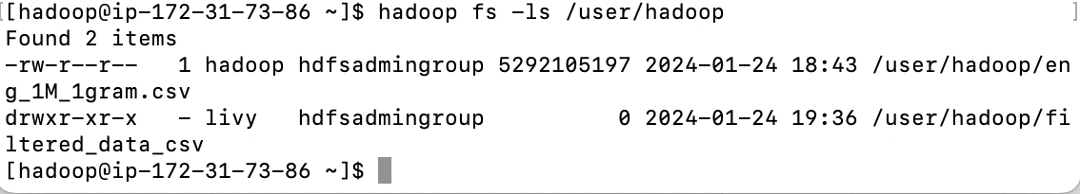

In [4]:
from IPython.display import Image

Image(filename='/Users/zhassulan/Desktop/Deliverable4/Q4c.png')


Through Terminal we run command hadoop fs -ls /user/hadoop

to see if we done passing df_filtered to HDFS